In [ ]:
#PART 1
#a )  Distances
"""
Data point      distance to test instance
p1                  .364
p2                  .1
p3                  .461
p4                  .461
p5                  .4924
p6                  .255
p7                  .112
p8                  .3201
p9                  .158
p10                 .1802
"""

In [ ]:
#b) 
"""
classification : ' + '

"""

In [ ]:
#c) 
"""
classification : ' - '

"""

In [ ]:
#D)
"""
Classifying the point as negative is more reliable in this case. P2 is the only positive point our test case
is close to. To get a second positive point you would have to look at the 7th closest point
"""

In [ ]:
#E)
"""
(-122.1774 * .2) + (-73.36 + .55) + (73.3023) 
-8.5672

It's class label is negative.
"""

In [ ]:
#2) 

"""
A)          Cluster assignment of data points                Centroid Locations
    iter   0.1  0.2  0.8  0.9  1.0  1.3  1.8  1.9            A       B       C
    0       -    -    -    -    -    -    -    -             0.1    0.2     1.9
    1       A    A    B    B    B    C    C    C             0.1    0.6     1.66
    2       A    A    B    B    B    C    C    C             0.15   0.6     1.66
    3       A    A    B    B    B    C    C    C             0.15   0.6     1.66            
"""

In [ ]:
"""
B)
    
SSE for A = .5093

"""

In [ ]:
"""
C)          Cluster assignment of data points                Centroid Locations
    iter   0.1  0.2  0.8  0.9  1.0  1.3  1.8  1.9            A       B       C
    0       -    -    -    -    -    -    -    -             0.8    1.0     1.8
    1       A    A    A    A    B    B    C    C             0.5    1.15    1.35
    2       A    A    A    B    B    C    C    C             0.37   0.95    1.6
    3       A    A    B    B    B    C    C    C             0.15   0.9     1.33   
    4       A    A    B    B    B    C    C    C             0.15   0.9     1.33        


"""

In [ ]:
"""
D)
    
SSE for C = .5717


The Solution in A is better in terms of SSE.

"""

In [ ]:
"""
#3 A) 
    
2- Item Sets             support values
Bread, Eggs                 4/10
Bread, Milk                 5/10 
Bread, Butter               5/10
Butter, Milk                5/10
      
      
#3 B)
3- Item Sets             support values
Bread, Eggs, Milk           3/10
Bread, Butter, Eggs         3/10
Bread, Butter,  Milk        4/10


# C)

Bread, Butter,  Milk        


# D)
Frequent Itemset Rules
Bread          -> Butter, Milk
Butter         -> Bread, Milk
Milk           -> Bread, Butter
Bread, Milk    -> Butter
Butter, Milk   -> Bread
Bread, Butter  -> Milk



#E) 
    Rule                        Confidence      Support
    Bread, Milk    -> Butter        1.0          4/10
    Butter, Milk   -> Bread         1.0          4/10
    Bread, Butter  -> Milk           .8          4/10

"""

,x1,x2
0,1.1700,1.2809
1,1.5799,0.6373
2,0.2857,0.6620
3,1.2726,0.7440
4,1.1008,0.0689


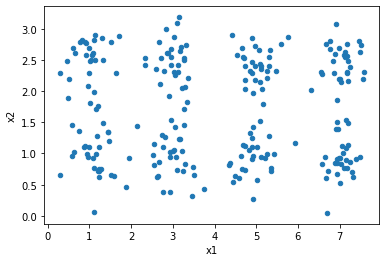

In [1]:
#PART 2

import pandas as pd
import matplotlib
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

data = pd.read_csv('2d_data2.csv', names = ['x1' , 'x2'])
data.plot.scatter(x = 'x1', y = 'x2')
data.head()

In [2]:
from sklearn import cluster
import numpy as np


def calc_SSE(points, centroids,sse, replacement_index):
    cent_index = 0
    for i in points.cluster.unique():
        cluster = points[points.cluster == i]
        temp = [0 for x in range(0, len(centroids))]
        for index, row in cluster.iterrows():
             temp[0] += (row[0] - centroids[cent_index][0])**2
             temp[1] += (row[1] - centroids[cent_index][1])**2
        cent_index += 1
        if i == replacement_index:
            sse[replacement_index] = temp[0] + temp[1]
        else:        
            sse.append(temp[0] + temp[1])


def bisect(data, k, seed = 1):
    
    labels = pd.Series(np.zeros(data.shape[0]))

    SSE = []
    SSE.append(1365)

    data['cluster'] = 0
        
    print('Iteration 0  SSE =', SSE)
    """
    refactoring commented shit below
    need to rework SSE Calculation...
    
    """
    for numClusters in np.arange(1,k): 
        #choose cluster to split up
        cluster_to_split = SSE.index(max(SSE))
        #temp is THAT cluster
        temp = data[data.cluster == cluster_to_split]
        #fit and split it into 2 clusters
        clusters = cluster.KMeans(n_clusters=2)
        clusters.fit(temp)

        init_centroids = clusters.cluster_centers_
        temp['cluster'] = clusters.labels_
        #adjusting labels, not needed first iteration
        if numClusters != 1:
            for index, row in temp.iterrows():
                if row[2] == 1 :
                    temp['cluster'][index] = numClusters
                else:
                    temp['cluster'][index] = cluster_to_split
            
        for index, row in temp.iterrows():
            data['cluster'][index] = row[2]
        
        calc_SSE(temp,init_centroids, SSE, cluster_to_split)
        
        
        
        print('Iteration', numClusters, ' SSE =', SSE)
    labels = data['cluster']
    return labels

Iteration 0  SSE = [1365]
Iteration 1  SSE = [2103.4707919028338, 2093.872453869999]
Iteration 2  SSE = [300.0404370126668, 2093.872453869999, 298.964004146]
Iteration 3  SSE = [300.0404370126668, 272.3081976337719, 298.964004146, 265.1841053814029]
Iteration 4  SSE = [4.395181066999999, 272.3081976337719, 298.964004146, 265.1841053814029, 4.958932097666667]
Iteration 5  SSE = [4.395181066999999, 272.3081976337719, 72.56613913260404, 265.1841053814029, 4.958932097666667, 68.91895606921958]
Iteration 6  SSE = [4.395181066999999, 74.05882491360043, 72.56613913260404, 265.1841053814029, 4.958932097666667, 68.91895606921958, 78.53464860638888]
Iteration 7  SSE = [4.395181066999999, 74.05882491360043, 72.56613913260404, 73.65474514592222, 4.958932097666667, 68.91895606921958, 78.53464860638888, 77.16152475356722]


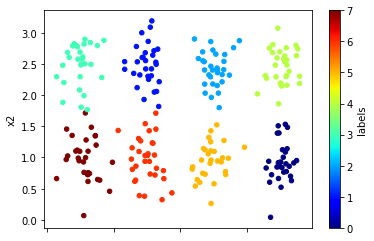

In [3]:
data['labels'] = bisect(data, 8, 1)
data.plot.scatter(x = 'x1', y = 'x2', c = 'labels' , colormap='jet')

In [69]:
import pandas as pd

data = pd.read_csv('lympho.csv', names = [x for x in range(0,19)])
print(data.head(n = 10))

    0    1    2    3    4    5    6    7    8    9    10   11   12   13   14  \
0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
1  1.0  1.0  1.0  1.0  1.0  2.0  1.0  2.0  1.0  2.0  2.0  1.0  1.0  2.0  1.0   
2  3.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  3.0  1.0  1.0  2.0  2.0  8.0  1.0   
3  3.0  1.0  1.0  1.0  2.0  2.0  2.0  1.0  3.0  1.0  1.0  4.0  2.0  5.0  3.0   
4  3.0  2.0  2.0  2.0  2.0  2.0  2.0  1.0  2.0  2.0  2.0  4.0  2.0  4.0  3.0   
5  3.0  1.0  1.0  1.0  2.0  2.0  2.0  1.0  3.0  1.0  1.0  2.0  1.0  5.0  3.0   
6  3.0  2.0  1.0  1.0  2.0  2.0  1.0  2.0  1.0  3.0  3.0  2.0  3.0  4.0  2.0   
7  3.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  2.0  2.0  4.0  3.0  5.0  1.0   
8  2.0  1.0  1.0  1.0  1.0  1.0  1.0  2.0  1.0  3.0  3.0  3.0  3.0  6.0  3.0   
9  2.0  2.0  1.0  1.0  1.0  1.0  1.0  2.0  1.0  2.0  3.0  2.0  3.0  8.0  2.0   

    15   16   17  18  
0  1.0  1.0  1.0   1  
1  1.0  1.0  2.0   1  
2  2.0  2.0  4.0   1  
3  1.0  2.0  4.0   1  
4  2

In [70]:
y = data[18]
data.drop([18] , axis=1)
x = data
print('Size of data =', data.shape)

print('Class distribution:')
y.value_counts()

Size of data = (148, 19)
Class distribution:


0    142
1      6
Name: 18, dtype: int64

In [72]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size= .8, random_state=1)

knn = 10

clf = KNeighborsClassifier(n_neighbors=knn)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

    

nbrs = NearestNeighbors(n_neighbors=knn+1).fit(data.values)
distances, indices = nbrs.kneighbors(data.values)
sort_dist = np.flipud(np.sort(distances[:,knn]))


results = pd.DataFrame(np.column_stack((y,distances[:,knn])),columns=['predicted','k-distance'])

print(results)

     predicted  k-distance
0          1.0    4.242641
1          1.0    3.741657
2          1.0    4.690416
3          1.0    4.472136
4          1.0    4.000000
..         ...         ...
143        0.0    3.741657
144        0.0    3.464102
145        0.0    2.645751
146        0.0    3.000000
147        0.0    2.449490

[148 rows x 2 columns]


In [80]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

acc = (accuracy_score(Y_test, Y_pred))

print(acc)

0.9663865546218487


In [81]:
cm = confusion_matrix(Y_test, Y_pred) 
cm

array([[115,   0],
       [  4,   0]], dtype=int64)